In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Load model

In [4]:
model= tf.keras.models.load_model('trained_model.keras')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualize Single Image 

In [6]:
!pip install opencv-python

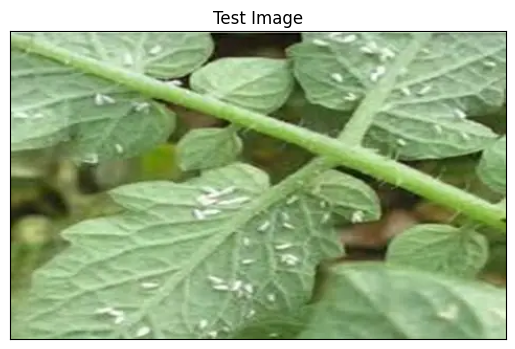

In [25]:
import cv2
image_path =r"C:\Users\ORNI\Desktop\tomato.webp"

#Read image
img=cv2.imread(image_path)

#convert bgr to rgb
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 


#Displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Test model

In [26]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr =tf.keras.preprocessing.image.img_to_array(image)
#convert image into batch
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [27]:
print("Image shape:", input_arr.shape)
print("Pixel value range: min =", np.min(input_arr), ", max =", np.max(input_arr))

Image shape: (1, 128, 128, 3)
Pixel value range: min = 0.0 , max = 255.0


In [28]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 49ms/step


(array([[3.6497946e-10, 1.1475078e-15, 2.0695996e-17, 1.2062719e-15,
         1.3763680e-20, 6.5810394e-13, 8.3223100e-20, 9.4620329e-05,
         3.4736430e-10, 5.4979125e-08, 6.0590032e-02, 5.4394375e-16,
         8.4797031e-17, 1.8126954e-14, 5.4291288e-18, 1.2547263e-15,
         2.0773596e-09, 1.6303823e-17, 2.6024836e-16, 3.7197486e-15,
         9.8595584e-14, 2.2050868e-17, 1.4530934e-13, 2.7128501e-18,
         1.5197819e-17, 9.3931288e-01, 2.3857772e-06, 1.7362299e-15,
         1.9499670e-15, 1.4773367e-13, 1.5662999e-10, 2.4355033e-20,
         1.5530051e-18, 3.7732031e-20, 7.7881572e-16, 2.4508983e-14,
         1.2655424e-22, 1.7978670e-16]], dtype=float32),
 (1, 38))

In [29]:
result_index = np.argmax(prediction)
result_index
print("Confidence:", np.max(prediction) * 100, "%")

Confidence: 93.93128752708435 %


In [30]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

## Show result

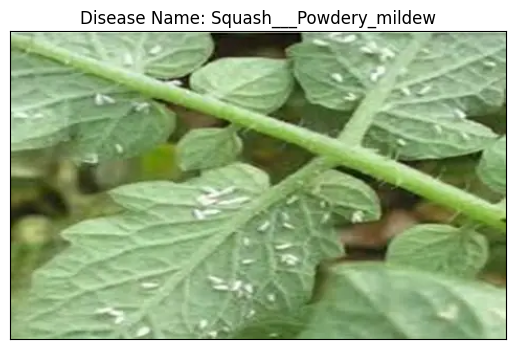

In [31]:
model_prediction =class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
model_prediction

'Squash___Powdery_mildew'